## Importing EDA Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset
filepath = "/content/drive/MyDrive/CPE312-Machine Learning/data/fetal_health.csv"
fetal_df = pd.read_csv(filepath)
print('fetal_df.shape: {}'.format(fetal_df.shape))

fetal_df.shape: (2126, 22)


## About Dataset

In [ ]:
# check dataset info
fetal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**Insights**

From the dataset info, it seems that there are **2,126 records** and **22 columns** in the dataframe. Each column holds **no missing values** and that all of the columns are of type `float64`.

In [ ]:
# check few records of the dataset
fetal_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
# check value counts of the target variable
fetal_df.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

**Insights**

Because of the filename of the csv file, I'm assuming that the target variable is the `fetal_health` column. From the output of the previous cell, it seems that this is a **multiclass classification problem** as there are more than two classes in the dataframe.

It's also worth noting that the respective counts of each classes are imbalanced with class-1 being the modal class or having the highest number of counts among the three classes. This means that using other classification metrics beside accuracy is important to assess the performance of the ML models.

In [ ]:
# convert the target variable dtype to int so that it's easier to work with
fetal_df.fetal_health = fetal_df.fetal_health.astype(int)
print('fetal_health.dtype: {}'.format(fetal_df.fetal_health.dtype))

fetal_health.dtype: int64


## Exploratory Data Analysis

In [ ]:
# fetch the features
features = fetal_df.columns[:-1]
target = fetal_df.columns[-1]
print('features len: {}'.format(len(features)))

features len: 21


In [ ]:
# check descriptive statistics of the features
fetal_df[features].describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000


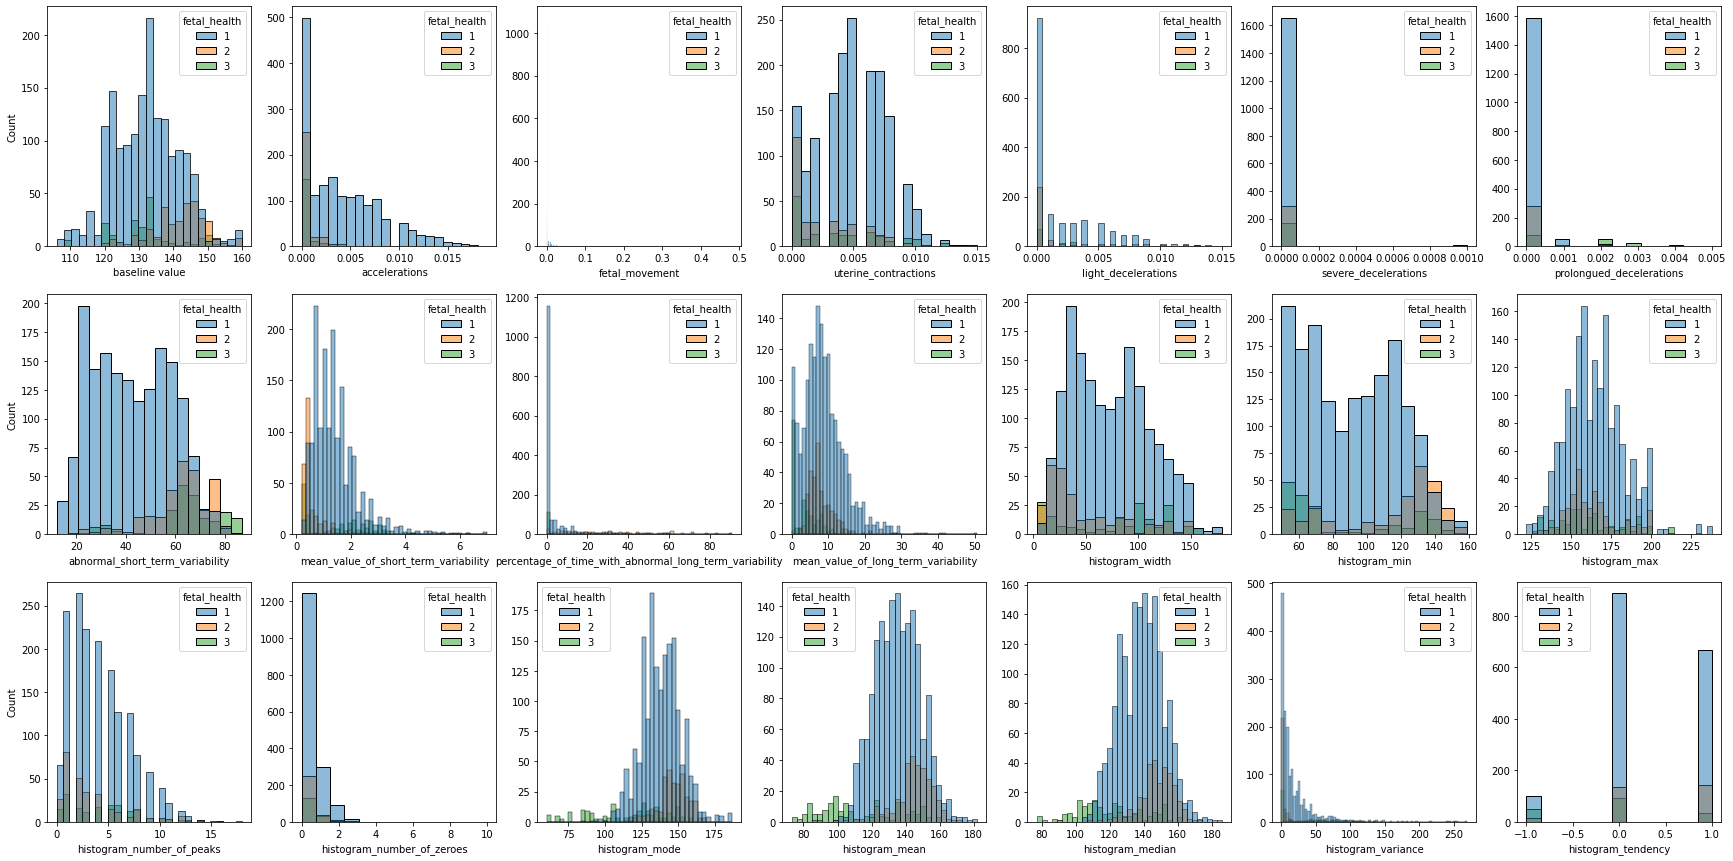

In [ ]:
# check distribution of each features
fig, axes = plt.subplots(3, 7, figsize=(30, 15))
pallete = ["C0", "C1", "C2"]
for feat, ax, i in zip(features, axes.flatten(), range(21)):
  sns.histplot(data=fetal_df, x=feat, hue='fetal_health', ax=ax, palette=pallete)
  if i not in (0, 7, 14): ax.set_ylabel('')

**Insights**

The figure above shows the distribution of each feature per classes in the dataset. From this figure, it's apparent that:

- Some of the features follows skewed distributions (which may need to be normalized).
- Majority of feature distributions per classes have overlaps which means that it will be challenging for the machine learning models to separate the three classes using these feature measurements.
- The features `histogram_mode`, `histogram_mean`, and `histogram_median` seem to be an important features as they separate well the three classes, on average.
- The imbalanced counts between the three classes are clear (with class-1 being the modal class).
- The features have different scale which signifies that applying scale transformation is important.

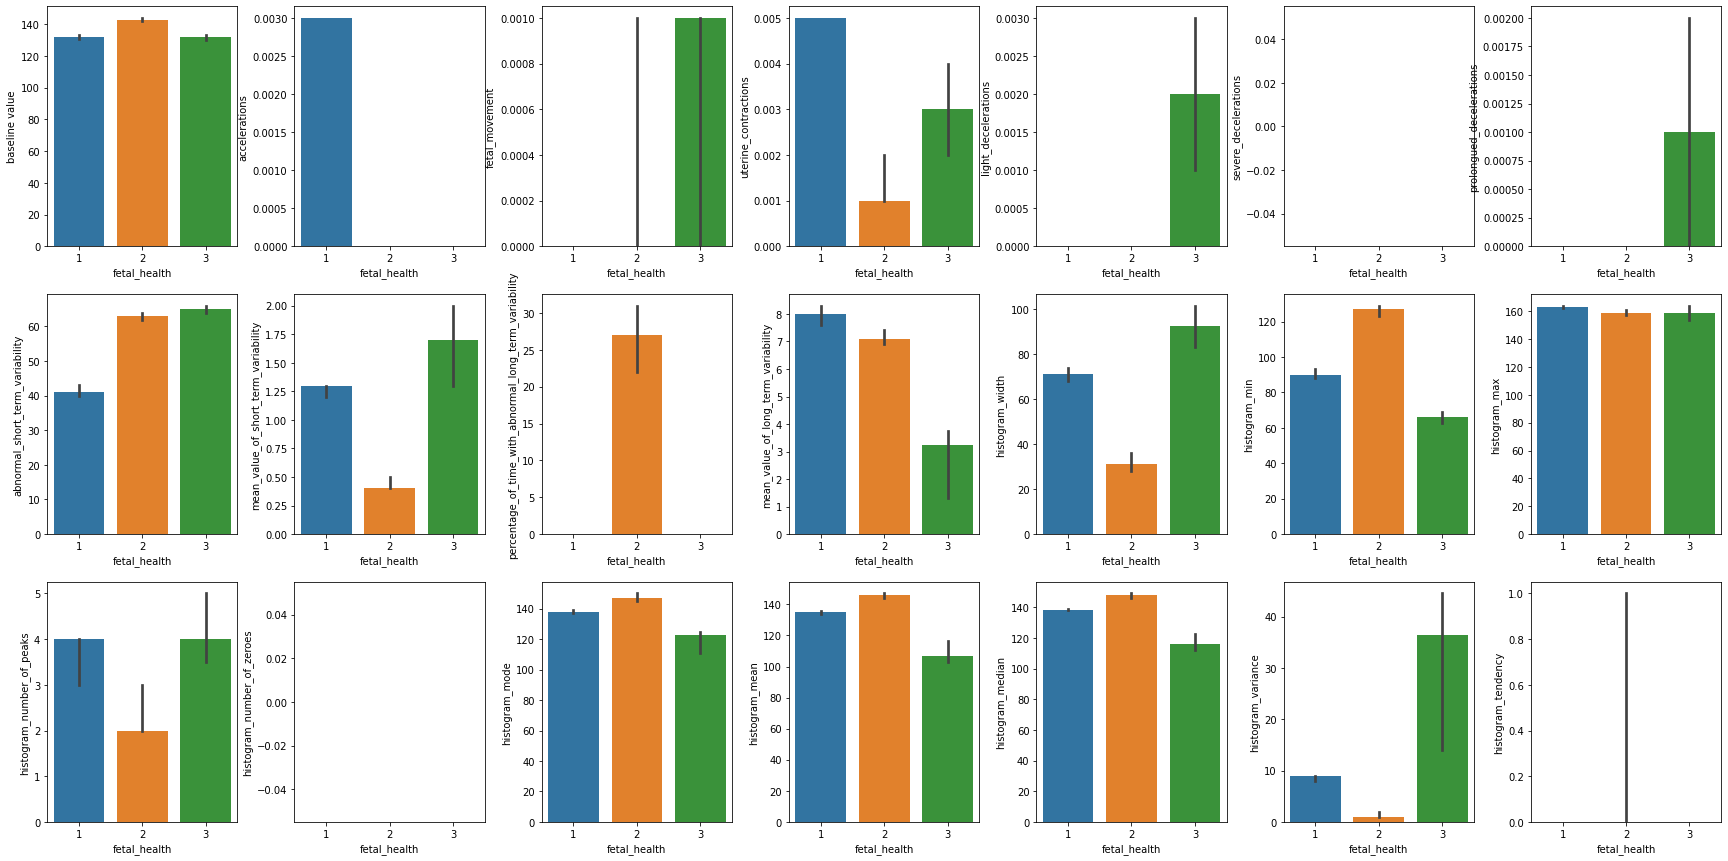

In [ ]:
# check feature median differences and confidence intervals between each classes
fig, axes = plt.subplots(3, 7, figsize=(30, 15))
for feat, ax, i in zip(features, axes.flatten(), range(21)):
  sns.barplot(data=fetal_df, estimator=np.median, x='fetal_health', y=feat, ax=ax)
fig.subplots_adjust(wspace=0.30)

**Insights**

The figure above shows the point estimate (median) differences and confidence intervals per feature of the three classes. From this figure, it's apparent that:

- Some of the features shows no median differences between the three classes. For example, the features `severe_decelerations`, `histogram_number_of_zeros`, and `histogram_tendency` show no median differences between the three classes which means that these features could be "not important" or insignificant features.

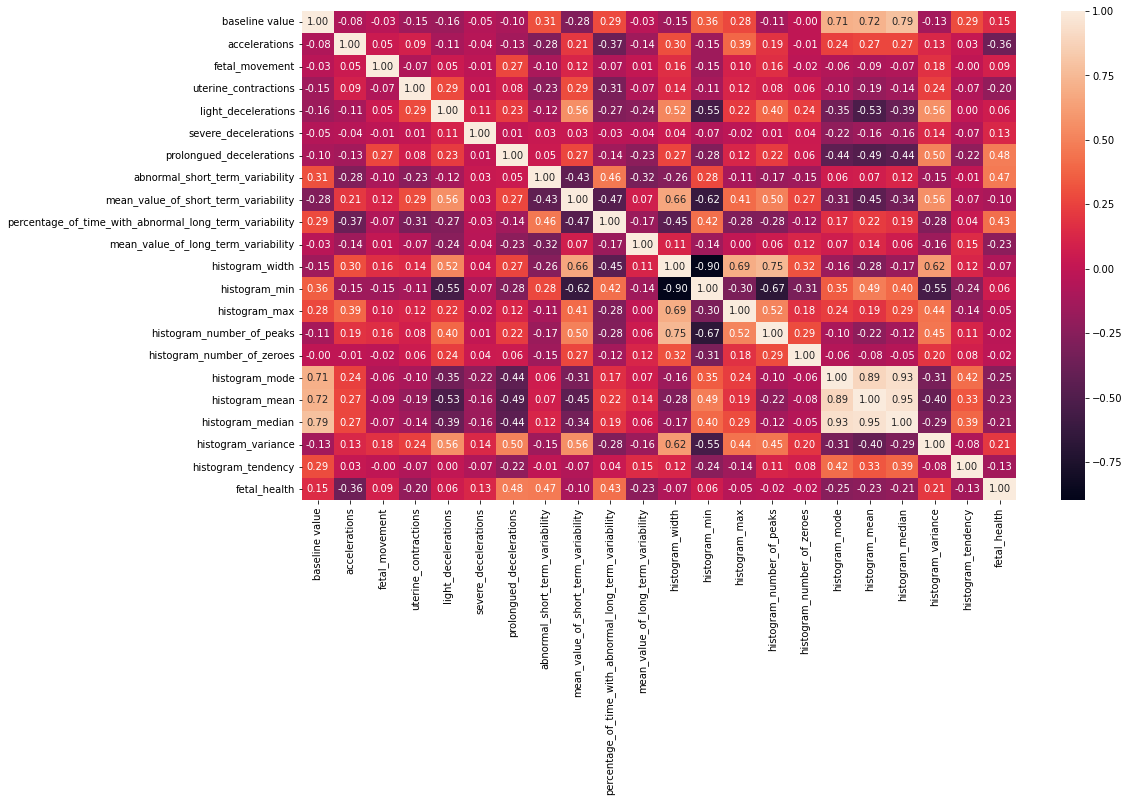

In [ ]:
# visualize correlation coefficient between each features
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(
    data=fetal_df.corr(),
    annot=True,
    fmt='.2f',
    ax=ax
)

**Insights**

The figure above shows correlation coefficent between each pair of features in the dataframe. From this figure it's apparent that:

- Multicollinearity is present in the dataset. Collinearity is a linear association between two explanatory variables. For example, the features `histogram_width` and `histogram_min` has a strong negative correlation of -0.90, this could be problematic for a model such as logistic regression which assumes that no multicollinearity should be present in the dataset.

- The most correlated features to the target variable (`fetal_health`) are `prolongued_decelerations`, ` abnormal_short_term_variability`, and `percentage_of_time_with_abnormal_long_term_variability`

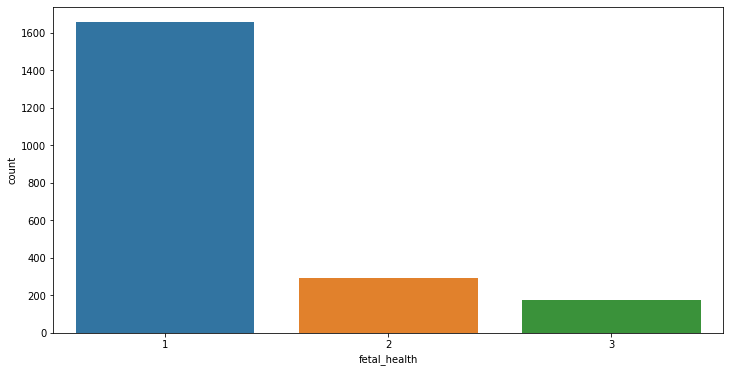

In [ ]:
# check target variable distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=fetal_df, x='fetal_health', ax=ax)

**Insights**

As has been noted in the previous cells, the respective counts of each classes are imbalanced with class-1 being the modal class or having the highest number of counts among the three classes. This means that using other classification metrics beside accuracy is important to evaluate the performance of the ML models.

## Data Preprocessing

As been noted during explanatory data analysis section, there are features that follows skewed distributions which could problematic for the models such as `GaussianNB` which assumes normally distributed data. Because of this, I'll transform the skewed features using `log` transformation so that all features will follow a normal distribution and therefore satisfy the assumptions of some machine learning algorithms.

In [ ]:
# view the most skewd features in the dataframe
skew = pd.DataFrame(fetal_df[features].skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew[skew.too_skewed]

,skew,too_skewed
accelerations,1.204392,True
fetal_movement,7.811477,True
light_decelerations,1.718437,True
severe_decelerations,17.353457,True
prolongued_decelerations,4.323965,True
mean_value_of_short_term_variability,1.657339,True
percentage_of_time_with_abnormal_long_term_variability,2.195075,True
mean_value_of_long_term_variability,1.331998,True
histogram_number_of_peaks,0.892886,True
histogram_number_of_zeroes,3.920287,True


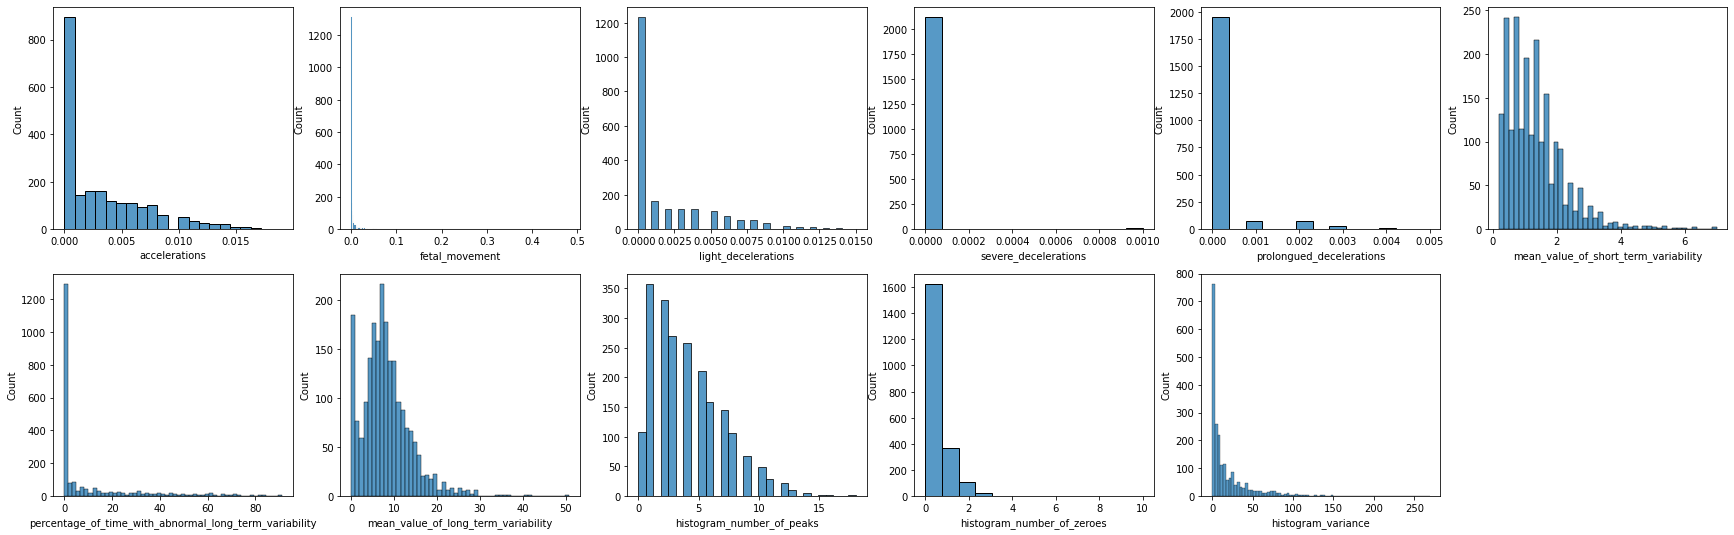

In [ ]:
# view the original distributions of skewed features
fig = plt.figure(figsize=(30, 9))
axes = [fig.add_subplot(2, 6, i) for i in range(1, skew[skew.too_skewed].shape[0]+1)]
for feat, ax in zip(skew[skew.too_skewed].index, axes):
  sns.histplot(data=fetal_df, x=feat, ax=ax)

In [ ]:
# reduce the skewness of the skewed distributions using log transformation
skewed_feats = skew[skew.too_skewed].index
fetal_df[skewed_feats] = np.log(fetal_df[skewed_feats] + 1)

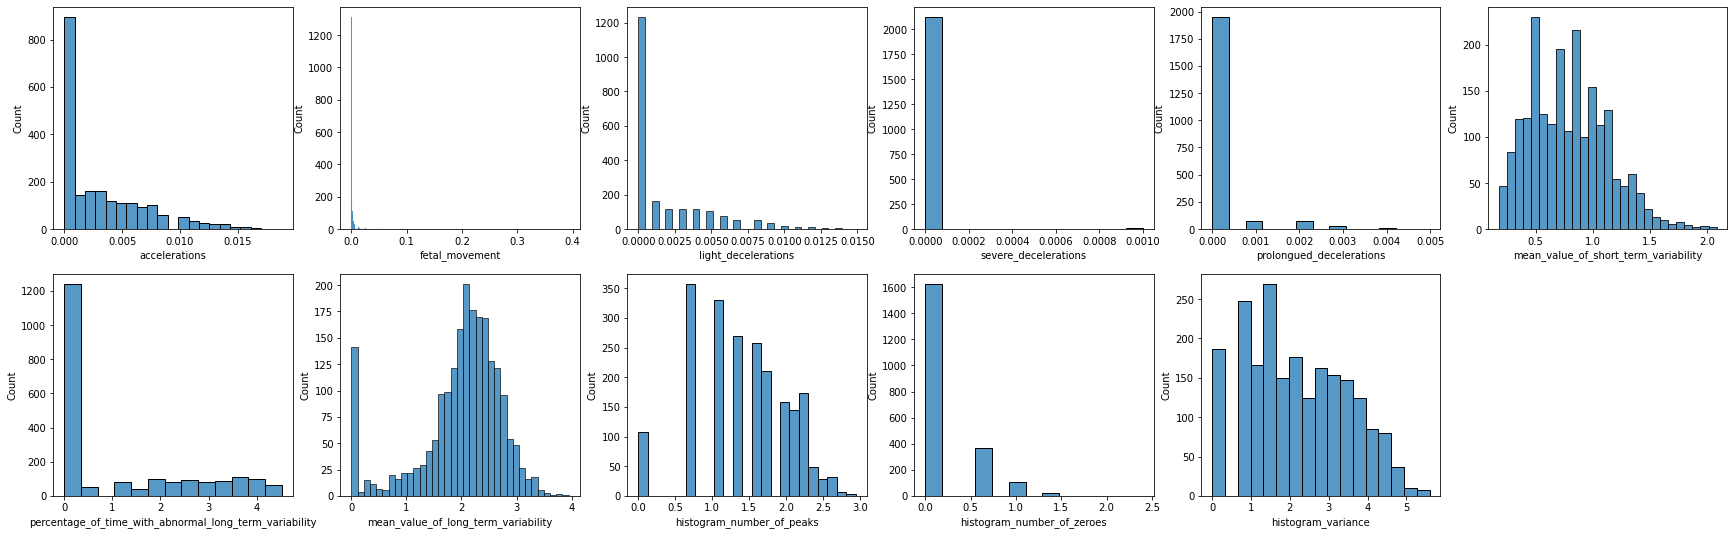

In [ ]:
# view the updated distributions of skewed features
fig = plt.figure(figsize=(30, 9))
axes = [fig.add_subplot(2, 6, i) for i in range(1, skew[skew.too_skewed].shape[0]+1)]
for feat, ax in zip(skew[skew.too_skewed].index, axes):
  sns.histplot(data=fetal_df, x=feat, ax=ax)

**Insights**

The figure above shows the updated distributions of the skewed features using the `log` transformation. Based on this figure it's apparent that:

- The features `mean_value_of_long_term_variability`, `histogram_number_of_peaks`, `histogram_variance`, and `mean_value_of_short_term_variability` has significant improvement on their respective distributions as they follow a normal distribution now more than their previous distribution.

- Because of the nature of some of the features (they are too skewed to begin with) such as `fetal_movement`, `accelerations`, `ligth_decelerations`, and etc. The `log` transformation wasn't able to normalized them.

## Base/Preliminary Modeling

In this section, I scaled the dataset using `MinMaxScaler` so that each feature will have the same scale. I then fit `LogisticRegression`, `DecisionTreeClassifier`, `RandomForestClassifier`, `KNeighborsClassifier`, `SVC`, and `GaussianNB` (for continuous data) without hyperparameter tuning to the training dataset to see and compare their base performance on the testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# fetch features and target variable
X = fetal_df.drop('fetal_health', axis=1)
y = fetal_df.fetal_health

# train-test-split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print('X_train.shape: {}'.format(X_train.shape))
print('X_test.shape: {}'.format(X_test.shape))

X_train.shape: (1488, 21)
X_test.shape: (638, 21)


In [ ]:
from sklearn.preprocessing import MinMaxScaler                                  # use MinMaxScaler to scale the data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB                                      # use GaussianNB as data is continuous
from sklearn.metrics import classification_report                               # to make classification report for each base model
from sklearn.metrics import ConfusionMatrixDisplay                              # for plotting confusion matrices


# base model storage
models = {
    'logreg': LogisticRegression,
    'clf_dt': DecisionTreeClassifier,
    'rf': RandomForestClassifier,
    'knn': KNeighborsClassifier,
    'svm': SVC,
    'gauss_nb': GaussianNB
}


# base model test dataset prediction storage
preds = {}

for key, model in models.items():

  # scaled the training and testing dataset using MinMaxScaler()
  scaler = MinMaxScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # fit model to the training dataset and make predictions on testing dataset
  try:
    m = model(random_state=42).fit(X_train_scaled, y_train)
  except:
    m = model().fit(X_train_scaled, y_train)
  preds[key] = m.predict(X_test_scaled)

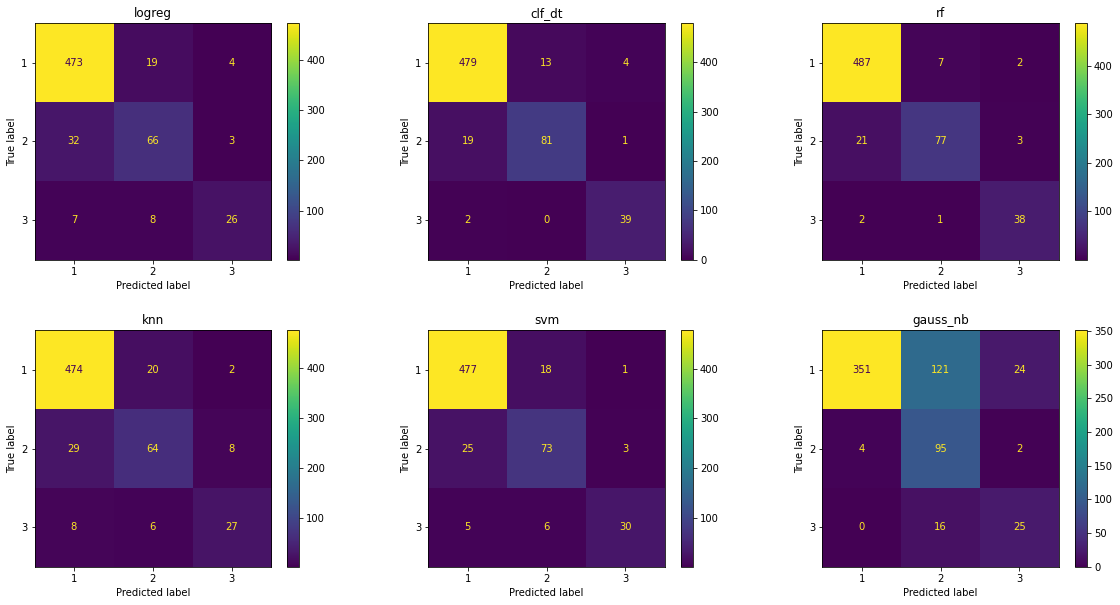

In [ ]:
# visualize confusion matrix of each model
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for (model, y_pred), ax in zip(preds.items(), axes.flatten()) :
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
  ax.set_title(model)

fig.subplots_adjust(hspace=0.3)

**Insights**

The figure above shows the confusion matrix of each model based on their respective predictions on the testing dataset. From this figure it can be observed that:

- `rf` (or random forest) has the highest number of correct predictions (487) on class-1. This model is the best base/preliminary model to use if it's more important to correctly classify all the class-1 samples.

- `gauss_nb` (or gaussian naive bayes) has the highest number of correct predictions (95) on class-2. This model is the best base/preliminary model to use if it's more important to correctly classify all the class-2 samples.

- Both `clf_dt` and `rf` (decision tree and random forest) has the highest number of correct predictions (39 and 38, respectively) on class-3. These model are the best base/preliminary model to use if it's more important to correctly classify all the class-3 samples.

In [ ]:
# make classification report on testing dataset
for model, y_pred in preds.items():
  print('-' * 60)
  print(model)
  print(classification_report(y_test, y_pred))

------------------------------------------------------------
logreg
              precision    recall  f1-score   support

           1       0.92      0.95      0.94       496
           2       0.71      0.65      0.68       101
           3       0.79      0.63      0.70        41

    accuracy                           0.89       638
   macro avg       0.81      0.75      0.77       638
weighted avg       0.88      0.89      0.88       638

------------------------------------------------------------
clf_dt
              precision    recall  f1-score   support

           1       0.96      0.97      0.96       496
           2       0.86      0.80      0.83       101
           3       0.89      0.95      0.92        41

    accuracy                           0.94       638
   macro avg       0.90      0.91      0.90       638
weighted avg       0.94      0.94      0.94       638

------------------------------------------------------------
rf
              precision    recall  f1-

**Insights**

The output above shows the classification report on testing dataset for each of the model. As the dataset is imbalanced, I'll not used accuracy as the classification metric as the model can get a non-realistic high accuracy on the testing set by just predicting the label of the majority class. Because of this, I focused mainly on the comparison of precision and recall scores for each class.

**Recall**
- out of total positive actual values, what proportion were predicted correctly?
- must be use if finding all positive instances is more important.
- here we're minimizing the false negatives.

**Precision**
- out of total predicted positive values, what proportion were correct?
- must be use if classifying a sample as not positive is more important.
- here we're minimizing the false positives.


Now, depending on the business goal and metric, and what is the class of interest between the three classes, either recall or precision will be optimized for that positive class.

Assuming that the class of interest is class-3, the best base model to use is either decision tree (`clf_dt`) or random forest (`rf`) as both the models has the highest precision (**0.89** and **0.88**, respectively) and recall (**0.95** and **0.93**, respectively) score for class-3 among the six models. This means that these models
has a detection rate of around **93% to 95%** for class-3 samples with **88% to 89%** precision (the ability of the classifier not to label as positive a sample that is negative).

## Model Improvement

In this section, I improved all the models performance by means of feature selection (disregard insignificant features), hyperparameter tuning using grid search, and trying out other scalers.

Note: No tuning was done on `GaussianNB` as it has no parameters to tune.

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# setup the algorithmic chain or pipeline
pipe = Pipeline([('scaler', StandardScaler()),                                  # apply StandardScaler() to scale the data (initial only)
                 ('select', SelectPercentile()),                                # use SelectPercentile() to implement feature selection
                 ('classifier', LogisticRegression()),                          # use LogisticRegression() as classifier (inital only)
                 ])

# view step process
print("Pipe steps: {}".format(pipe.steps))

Pipe steps: [('scaler', StandardScaler()), ('select', SelectPercentile()), ('classifier', LogisticRegression())]


In [ ]:
# setup the parameter grid to search to
param_grid = [
              {'classifier': [LogisticRegression(                               # classifier: LogisticRegression
                  random_state=42, solver='liblinear', max_iter=10000)],
               'scaler': [StandardScaler(), MinMaxScaler()],                    # try out both MinMaxScaler() and StandardScaler() to scale the data and see what is the better scaler to use
               'select__percentile': list(range(100, 1, -10)),                  # try out different percentile values for the SelectPercentile() to find optimal percent of features to retain (feature selection)
               'classifier__penalty': ['l1', 'l2'],                             # try out both l1 and l2 penalty
               'classifier__C':  [0.001, 0.01, 0.1, 1, 10, 100],                # try out different regularization parameter C
               },

              {'classifier': [DecisionTreeClassifier(random_state=42)],         # classifier: DecisionTree
               'scaler': [None],                                                # scaler isn't necessary as decision tree is not distance based
               'select__percentile': list(range(100, 1, -10)),                  # try out different percentile values for the SelectPercentile() to find optimal percent of features to retain (feature selection)
               'classifier__max_depth': list(range(30, 0, -5))                  # try out different max_depth parameter (maximum depth of the tree from 30 to 5) to prevent overfitting
               },

              {'classifier': [RandomForestClassifier(
                  n_estimators=1000, random_state=42)],                         # classifier: RandomForestClassifier
               'scaler': [None],                                                # scaler isn't necessary as random forest is not distance based
               'select__percentile': list(range(100, 1, -10)),                  # try out different percentile values for the SelectPercentile() to find optimal percent of features to retain (feature selection)
               'classifier__max_features': [1, 2, 3],                           # try out different number of features to consider when looking for the best split
              },

              {'classifier': [SVC(random_state=42, probability=True)],          # classifier: SVC
               'scaler': [StandardScaler(), MinMaxScaler()],                    # try out both MinMaxScaler() and StandardScaler() to scale the data and see what is the better scaler to use
               'select__percentile': list(range(100, 1, -10)),                  # try out different percentile values for the SelectPercentile() to find optimal percent of features to retain (feature selection)
                'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],            # try out different gamma values
                'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},               # try out different C values

              {'classifier': [KNeighborsClassifier()],                          # classifier: KNeighborsClassifier
               'scaler': [StandardScaler(), MinMaxScaler()],                    # try out both MinMaxScaler() and StandardScaler() to scale the data and see what is the better scaler to use
               'select__percentile': list(range(100, 1, -10)),                  # try out different percentile values for the SelectPercentile() to find optimal percent of features to retain in feature selection
               'classifier__weights': ['uniform', 'distance'],                  # try out different weights parameter value for KNN model
               'classifier__p': [1, 2],                                         # try out p=1 (manhattan distance) and p=2 (euclidean distance) for KNN model
               'classifier__n_neighbors': list(range(1, 51))},                  # try out different n_neighbors value for KNN model

              {'classifier': [GaussianNB()],                                    # classfier: GaussianNB (for continuous data)
               'scaler': [None],                                                # scaler isn't necessary as naive bayes is not distance based
               'select__percentile': list(range(100, 1, -10)),                  # try out different percentile values for the SelectPercentile() to find optimal percent of features to retain (feature selection)
               }
]

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# NOTE: grid search may take a while to run (in my case the runtime was 1 hour!)
# do grid search on given parameter grid with 10-fold cv
# use roc_auc metric for each label, and find their average, weighted by support as the classes are imbalanced (roc_auc_ovr_weighted)
grid = GridSearchCV(pipe, param_grid=param_grid, cv=10, scoring='roc_auc_ovr_weighted')
grid.fit(X_train, y_train)
print("Best cross-validation weighted roc_auc: {:.2f}".format(grid.best_score_))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation weighted roc_auc: 0.98
Best parameters: {'classifier': RandomForestClassifier(max_features=3, n_estimators=1000, random_state=42), 'classifier__max_features': 3, 'scaler': None, 'select__percentile': 100}


**Insights**

Based on the result of the grid search and cross-validation, it seems that the random forest with the tuned hyperparameters of `max_features=3`, and `n_estimators=1000` are the best model among the tuned models. This model has a weighted average AUC of **0.98** which means that the ROC curve of this model is the closest to the top-left corner of the ROC graph and therefore the best model that produces a high recall score (TPR) while keeping a low false positive rate.

In [ ]:
import pprint

# convert the grid search results to dataframe
results = pd.DataFrame(grid.cv_results_)

# fetch all the best found parameters for each model
model_names = ['LogisticRegression', 'DecisionTreeClassifier',
              'RandomForestClassifier', 'KNeighborsClassifier',
               'SVC', 'GaussianNB']
model_best_params = {}
model_best_scores = {}
for name in model_names:
  mask = results.param_classifier.apply(lambda x: type(x).__name__ == name)
  best_model = results[mask].sort_values(by='mean_test_score', ascending=False).iloc[0]
  model_best_params[name] = best_model.params
  model_best_scores[name] = best_model.mean_test_score

# view best parameter and score for each model
for model in model_names:
  print('-' * 60)
  print('{}:'.format(model))
  print('Best weighted roc_auc score = {}'.format(model_best_scores[model]))
  print('Best parameters = {}'.format(model_best_params[model]))

------------------------------------------------------------
LogisticRegression:
Best weighted roc_auc score = 0.9674270409315285
Best parameters = {'classifier': LogisticRegression(max_iter=10000, random_state=42, solver='liblinear'), 'classifier__C': 1, 'classifier__penalty': 'l1', 'scaler': StandardScaler(), 'select__percentile': 100}
------------------------------------------------------------
DecisionTreeClassifier:
Best weighted roc_auc score = 0.9201234456654287
Best parameters = {'classifier': DecisionTreeClassifier(random_state=42), 'classifier__max_depth': 5, 'scaler': None, 'select__percentile': 20}
------------------------------------------------------------
RandomForestClassifier:
Best weighted roc_auc score = 0.9846603762503129
Best parameters = {'classifier': RandomForestClassifier(max_features=3, n_estimators=1000, random_state=42), 'classifier__max_features': 3, 'scaler': None, 'select__percentile': 100}
------------------------------------------------------------
KNei

**Insights**

The output above shows the best hyperparameter values for each model and the corresponding weighted auc score yielded for that tuned classifier. From the result it's apparent that:

- The tuned models actually have a close auc scores, from 0.92 of `DecisionTreeClassifier` to 0.98 of `RandomForestClassifier`.
- The `DecisionTreeClassifier` has the lowest weighted auc score of 0.92 and this performance can only be achieved by this model when its `max_depth` parameter was set to value of 5 and when it only uses 20% of the original features (`select__percentile`: 20) or the two most significant features from the dataset.
- The best `LogisticRegression` model has a regularization parameter value of `C=1`, uses an `l1` penalty, and uses `StandardScaler` to scale the data.
- The best `KNeighborsClassifier` model uses distance as `weights`, manhattan distance (`p=1`), considers 16 neighbors, and uses `StandardScaler` to scale the data. to maximise its auc score. It also worth noting that it uses only 60% of the original features or the top 6 most significant features in the dataset. It has an auc of 0.97 which is close to auc of the random forest classifier.
- The best `SVC` model uses a regularization parameter value of `C=100` and `gamma=0.1` and uses `MinMaxScaler` to scale the data. It has an auc that is the closest to the auc of random forest.
- To maximise the auc score of `GaussianNB`, it must use 60% of the original features or the top 6 most significant features in the dataset.

In [ ]:
# make predictions on the testing dataset using the tuned models
preds = {}
for model_name in model_names:
  pipe.set_params(**model_best_params[model_name])
  pipe.fit(X_train, y_train)
  preds[model_name] = pipe.predict(X_test)

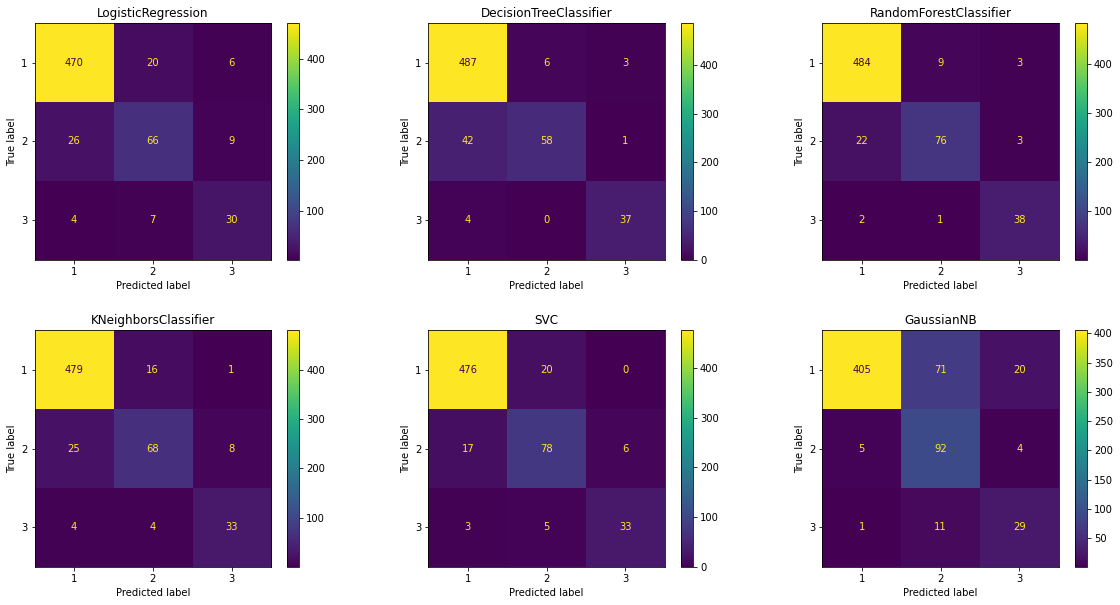

In [ ]:
# visualize confusion matrix of each model
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for (model, y_pred), ax in zip(preds.items(), axes.flatten()) :
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
  ax.set_title(model)

fig.subplots_adjust(hspace=0.3)

In [ ]:
# make classification report on testing dataset
for model, y_pred in preds.items():
  print('-' * 60)
  print(model)
  print(classification_report(y_test, y_pred))

------------------------------------------------------------
LogisticRegression
              precision    recall  f1-score   support

           1       0.94      0.95      0.94       496
           2       0.71      0.65      0.68       101
           3       0.67      0.73      0.70        41

    accuracy                           0.89       638
   macro avg       0.77      0.78      0.77       638
weighted avg       0.89      0.89      0.89       638

------------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           1       0.91      0.98      0.95       496
           2       0.91      0.57      0.70       101
           3       0.90      0.90      0.90        41

    accuracy                           0.91       638
   macro avg       0.91      0.82      0.85       638
weighted avg       0.91      0.91      0.91       638

------------------------------------------------------------
RandomForestC

**Insights**

The output above shows the classification report of each tuned model on the testing dataset. From the results of the classification reports, it's apparent that

- `LogisticRegression` has a significant improvement on the recall score for class-3. From 0.63 of the previous LogisticRegression to 0.73 of the current model with the best hyperparameter values. This means that the this model now has 73% detection rate of class-3 samples.

- `DecisionTreeClassifier` has improved the precision scores for class-2 and class-3 (the minority classes) from 0.86 and 0.89, respectively of the previous model to 0.91 and 0.90, respectively. Although, it improves both the precision to both minority classes, the tradeoff though is that the recall for class-2 significantly drops from 0.80 of the previous model to 0.57 of the current model.

- Although the best classifier found during validation phase, it seems that overall, the `RandomForestClassifier` has degraded its performance a bit on the precision and recall scores of the minority classes. My hypothesis is that the  the previous high performance of this model is due to chance, that is, sensitive to the split of the data. That's why I also use cross-validation in grid search so that effect of chance will be reduced by making sure that each example in the dataset (either those easy and hard to classify points)
will be in the training set exactly once: each example is in one of the folds, and each fold is the test set once.

- A significant improvement on precision and recall scores for the minority classes can also be observed when the `KNeighborsClassifier` is used. From 0.71 and 0.73 precision for class-2 and class-3, respectively of the previous version of this model to 0.77 and 0.79 precision, respectively. And from 0.63 and 0.66 recall for class-2 and class-3, respectively to 0.67 and 0.80 recall scores of the current model.

- Also with `SVC`, a significant improvement on recall scores for the minority classes can be observed. From 0.72 and 0.73 recall scores of the previous model for class-2 and class-3, respectively to 0.77 and 0.80 of the current version of this model.

- For `GaussianNB`, although still has a low precision scores for the minority classes, these scores actually improved from 0.41 and 0.49 of the precision scores of the previous models to 0.53 and 0.55, respectively for the class-2 and class-3 classes. The recall scores also for class-1 and class-3 improved significantly from 0.71 to 0.82 (class-1 recall) and from 0.61 to 0.71 (class-3 recall).

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# labels to binarize
labels = [1, 2, 3]
# Binarize ytest with shape (n_samples, n_classes)
y_test = label_binarize(y_test, classes=labels)

# report weighted roc_auc score on testing dataset
for model, y_pred in preds.items():
  print('-' * 60)
  # Binarize ypreds with shape (n_samples, n_classes)
  y_pred = label_binarize(y_pred, classes=labels)
  print('{model} weighted roc auc score: {score}'.format(model=model,
      score=roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted')))

------------------------------------------------------------
LogisticRegression weighted roc auc score: 0.8566637183082776
------------------------------------------------------------
DecisionTreeClassifier weighted roc auc score: 0.8290914930832197
------------------------------------------------------------
RandomForestClassifier weighted roc auc score: 0.9011568451537197
------------------------------------------------------------
KNeighborsClassifier weighted roc auc score: 0.8717276615722146
------------------------------------------------------------
SVC weighted roc auc score: 0.9012748717490461
------------------------------------------------------------
GaussianNB weighted roc auc score: 0.8824226438141872


**Insights**

The output above shows the roc auc score of each tuned model on the testing dataset, from this results it's apparent that the models: `RandomForestClassifier` and `SVC` has the highest weighted roc auc score among all the models. This means that these two models has the most ideal curves that are the closest to the top left corner of the ROC graph. This also means that these two models are the models that produces a high recall (TPR) while keeping a low false positive rate. Because of this, I conclude that either of these two models is the best model to use for the given problem statement.